<a href="https://colab.research.google.com/github/daniel-molina23/spotify-recommender-system/blob/danny/data_exploration_pt2_with_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import time
import numpy as np
import pandas as pd

num_columns = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo']
pca_cols = ['pca-one', 'pca-two', 'pca-three']

all_data = pd.read_csv('all_clustering_data.csv.zip', compression='zip', index_col=0)
print('finished reading data...')

finished reading data...


In [2]:
print(len(all_data['pca-one'].loc[all_data['true_labels'] == 0]))

49774


In [3]:
display(all_data.head())
true_labels = all_data['true_labels']

,user_id,artist,genre,popularity,acousticness,danceability,energy,instrumentalness,loudness,speechiness,tempo,mahala,p_value,true_labels,pca-one,pca-two,pca-three
0,dimitrivegas-likemike,Becky Hill,dance pop,7.200000e-07,0.725,0.30500,0.794,0.000000,-1.868056e-07,0.0699,7.747750e-08,3.797561,0.149751,0,-0.051912,-0.102332,0.006319
1,spinninrecordsofficial,Felix Jaehn,dance pop,4.500000e-07,0.581,0.26600,0.972,0.066300,-2.365741e-07,0.0384,7.810250e-08,5.468313,0.064949,0,-0.126421,0.009547,0.199872
2,21zg4rv77aorjcstyzll7pbvi,Aneesh Gera,art rock,0.000000e+00,0.702,0.00046,0.720,0.892000,-6.585648e-07,0.0398,7.499375e-08,7.401221,0.024708,1,0.170927,0.791511,-0.036552
3,g3rortuxyqju93m32z3z0s9mf,Brent Faiyaz,alternative metal,7.000000e-07,0.689,0.71100,0.394,0.000905,-7.794753e-07,0.0650,7.343063e-08,6.296565,0.042926,2,0.448631,-0.355169,-0.046627
4,12148144214,Dr. Dre,ccm,8.000000e-07,0.816,0.16000,0.775,0.000310,-2.564043e-07,0.2340,5.839437e-08,7.258942,0.026530,3,-0.161854,-0.052600,-0.132115


In [4]:
# imports
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [7]:
# find averages for each genre in the pca cols
sumKeys = {} # key=GENRE, value=(sum,count)
for i in range(len(all_data)):
  row = all_data[pca_cols].iloc[i,:].tolist()
  g = str(all_data.loc[i,['genre']][0])
  if(g not in sumKeys):
    sumKeys[g] = [np.array(row),1]
  else:
    sumKeys[g][0] += np.array(row) # element wise addition
    sumKeys[g][1] += 1
  if(i%10000 == 0):
    print('currently at row: ', i)
averages = [sumKeys[k][0]/sumKeys[k][1] for k in sumKeys.keys()]
print(averages)

currently at row:  0
currently at row:  10000
currently at row:  20000
currently at row:  30000
currently at row:  40000
currently at row:  50000
currently at row:  60000
currently at row:  70000
currently at row:  80000
currently at row:  90000
currently at row:  100000
currently at row:  110000
currently at row:  120000
currently at row:  130000
currently at row:  140000
currently at row:  150000
currently at row:  160000
currently at row:  170000
currently at row:  180000
currently at row:  190000
currently at row:  200000
currently at row:  210000
currently at row:  220000
currently at row:  230000
currently at row:  240000
currently at row:  250000
currently at row:  260000
currently at row:  270000
currently at row:  280000
currently at row:  290000
currently at row:  300000
currently at row:  310000
currently at row:  320000
currently at row:  330000
currently at row:  340000
currently at row:  350000
currently at row:  360000
currently at row:  370000
currently at row:  380000


In [5]:
array =np.array
averages = [array([-0.07294282, -0.00149951, -0.00366431]), array([0.01067376, 0.01543962, 0.00847777]), array([-0.08829865,  0.01752873,  0.04304421]), array([ 0.00206567, -0.01869383,  0.00937883]), array([-0.02083826, -0.03589015, -0.03410016]), array([-0.06978766, -0.02487074, -0.02470404]), array([-0.00804429,  0.01915367,  0.05375857]), array([-0.02535509, -0.00202075, -0.01294574]), array([-0.04871255, -0.04770197, -0.02117335]), array([-0.07233041, -0.0459891 , -0.02354127]), array([0.08780266, 0.13428767, 0.00740179]), array([ 0.00860741, -0.01967413,  0.04445603]), array([ 0.09543432, -0.09760845,  0.00739546]), array([ 0.0400513 , -0.02550707,  0.01616407]), array([ 0.19114584,  0.06247187, -0.01010856]), array([ 0.03894512, -0.02563088,  0.02064978]), array([-0.01399643, -0.00280596, -0.01994486]), array([-0.02991051,  0.00153883, -0.02114794]), array([ 0.15943562,  0.07733349, -0.01975194]), array([-0.04717752,  0.05868441,  0.02695013]), array([ 0.00228909, -0.0297325 , -0.0311579 ]), array([-0.03823469, -0.02117182, -0.02684425]), array([ 0.09339183, -0.07209002,  0.04585637]), array([-0.07359819,  0.02742619,  0.02858099]), array([ 0.0617612 , -0.03882275,  0.03526272]), array([ 0.03063941, -0.04912079, -0.00448464]), array([ 0.29118729,  0.10389437, -0.00760165]), array([ 0.1697275 , -0.06808937,  0.03435785]), array([ 0.06500803, -0.03929995,  0.02993036]), array([-0.0608757 ,  0.00348069,  0.00414036]), array([-0.02744207,  0.09208053,  0.01028347]), array([-0.06018059, -0.01829944, -0.05307939]), array([-0.00152274, -0.02422955, -0.04432692]), array([ 0.07843091, -0.09279972, -0.0171959 ]), array([-0.05641436,  0.01388471,  0.0227904 ]), array([-0.00854289, -0.00693547,  0.00234093]), array([-0.06837407,  0.03830914,  0.01705404]), array([-0.01815059, -0.04705173,  0.00782809]), array([-0.06337828,  0.01572928,  0.00377217]), array([ 0.05330787, -0.05703084,  0.05020332]), array([-0.09365571,  0.06207465,  0.02198936]), array([0.01436801, 0.01083347, 0.03744265]), array([ 0.02060893, -0.00425184,  0.02159968]), array([-0.0702385 ,  0.00412719,  0.01479675]), array([-0.0358273 , -0.00237733, -0.01922855]), array([ 0.01842155, -0.03858401, -0.03661546]), array([ 0.08042641, -0.06950322,  0.01121041]), array([ 0.0698464 , -0.06719938,  0.01851604]), array([-0.08922745,  0.04371025,  0.01221655]), array([ 0.01644315, -0.02085713, -0.01117281]), array([ 0.0292794 ,  0.01592511, -0.02720093]), array([ 0.04218282, -0.04881664, -0.01631489]), array([-0.01196489, -0.06159452, -0.04961692]), array([-0.07083495, -0.04220535, -0.01975779]), array([-0.08422919, -0.02539887, -0.01663996]), array([ 0.18383563, -0.04312887,  0.0437577 ]), array([ 0.07437975, -0.04475196,  0.04514723]), array([-0.02576188,  0.01774315,  0.02067483]), array([ 0.00334469, -0.05438174,  0.00994712]), array([-0.05454721, -0.02359474, -0.02666156]), array([-0.0902    , -0.02566339, -0.08673249]), array([ 0.19020237, -0.0418449 ,  0.03094813]), array([-0.00793286, -0.03563709, -0.0064828 ]), array([0.28405923, 0.15105331, 0.03845781]), array([-0.0328862 ,  0.05293823, -0.01158679]), array([-0.04201171,  0.04867883,  0.01040234]), array([ 0.00286364,  0.09298389, -0.02755155]), array([-0.00225325,  0.21850534, -0.05162166]), array([0.35644222, 0.05447723, 0.030951  ]), array([-0.02650382,  0.08664126,  0.00250616]), array([ 0.0184698 ,  0.01225695, -0.0010273 ]), array([-0.08968915,  0.12565419, -0.00734433]), array([-0.01454143, -0.03312069, -0.02820063]), array([-0.06323951, -0.00617717,  0.02632601]), array([ 0.10745188,  0.21882653, -0.05177509]), array([ 0.00468629, -0.0199742 ,  0.00476514]), array([-0.04388212, -0.07399171, -0.00184669]), array([-0.00270942,  0.13814954, -0.02097901]), array([-0.02145801, -0.02155559, -0.01329965]), array([ 0.03158613, -0.0295698 ,  0.01436074]), array([-0.0377052 , -0.02557706,  0.03096308]), array([-0.05799683, -0.01503101, -0.03159182]), array([-0.06004557, -0.04524106, -0.0482533 ]), array([-0.06838875, -0.07187034, -0.0239963 ]), array([-0.01496427, -0.04256382, -0.00438566]), array([-0.09646285,  0.00036392,  0.07094915]), array([-0.06629823, -0.02581319, -0.06740794]), array([-0.02946561, -0.01507136, -0.05075042]), array([ 0.17715053, -0.08195558,  0.03084599]), array([-0.08818755, -0.0051776 , -0.01662967]), array([-0.07697028,  0.06272554, -0.0065669 ]), array([ 0.15521446, -0.16722379,  0.02695346]), array([-0.0031217 , -0.06745266, -0.03909563]), array([-0.05232899, -0.0146453 , -0.04072832]), array([ 0.01671071,  0.01187721, -0.00788773]), array([ 0.12461274, -0.03275102, -0.01980047]), array([-0.04695936, -0.05125813, -0.02848096]), array([ 0.00378876, -0.02854766, -0.01968054]), array([-0.0988038 ,  0.09888857, -0.0037609 ]), array([-0.05336679, -0.00795887,  0.03350874]), array([0.19646566, 0.11902802, 0.04892592]), array([ 0.00492575, -0.03409979, -0.00366759]), array([ 0.00231684, -0.05042604, -0.00313717]), array([ 0.01585882, -0.0282872 ,  0.02432003]), array([-0.01837086,  0.02110641,  0.04144087]), array([-0.08745972,  0.05688075,  0.02722723]), array([-0.06173391, -0.05359239, -0.0021866 ]), array([-0.07602104,  0.11539604, -0.01500862]), array([-0.04870905, -0.05771599, -0.00411657]), array([ 0.15345107, -0.0667071 , -0.03274028]), array([ 0.19096453,  0.10732908, -0.01872791]), array([-0.04855382, -0.03494625,  0.01336914]), array([0.00766921, 0.07850493, 0.00793936]), array([-0.01998353, -0.01638332,  0.02113307]), array([-0.01809563, -0.03098107,  0.02227604]), array([-0.09576127,  0.08195819,  0.04008557]), array([ 0.1661075 , -0.10098638,  0.03682545]), array([0.00891228, 0.0248645 , 0.00958743]), array([0.36731395, 0.13508501, 0.07208734]), array([-0.0988819 ,  0.0779328 ,  0.02097367]), array([-0.06633056, -0.04475982, -0.03020272]), array([ 0.12582683, -0.03353488,  0.00622111]), array([ 0.04231867,  0.1492363 , -0.00855228]), array([-0.03751402, -0.04390282, -0.06029071]), array([ 0.04787062, -0.02710921,  0.00195277]), array([-0.00750847, -0.0309189 ,  0.03299808]), array([0.00382808, 0.00675522, 0.06209191]), array([-0.10826487,  0.00988187, -0.00444025]), array([-0.04867393,  0.11736245, -0.00180807]), array([-0.05813323,  0.00501257, -0.00990581]), array([ 0.02079845, -0.04466035,  0.04413076]), array([-0.05446848, -0.01702222, -0.01678955]), array([-0.15156142, -0.0064766 , -0.00453065]), array([ 0.02726395, -0.00064842, -0.0212942 ]), array([0.16772134, 0.06456993, 0.05365205]), array([ 0.07108789, -0.14282739,  0.00263656]), array([ 0.04594535,  0.02999459, -0.01901773]), array([-0.04106725, -0.03568906, -0.0510934 ]), array([-0.04781867,  0.00840828, -0.04309173]), array([0.18976932, 0.03664415, 0.04094378]), array([-0.0128005 ,  0.07293796, -0.00553969]), array([-0.1136302 ,  0.02244416,  0.03560789]), array([-0.01132633, -0.00495842, -0.00836105]), array([ 0.20308279, -0.05642905,  0.03730642]), array([-0.0481015 , -0.04612318, -0.05882893]), array([ 0.01255357,  0.11703733, -0.00082273]), array([0.4115917 , 0.13185638, 0.05476966]), array([-0.05311307, -0.05325617, -0.0454007 ]), array([ 0.03058462,  0.21533706, -0.01590719]), array([0.00344108, 0.02391331, 0.02049439]), array([0.08820823, 0.03713581, 0.00512859]), array([ 0.2868787 , -0.07118941,  0.04880825]), array([0.05495439, 0.073735  , 0.038062  ]), array([-0.07391068, -0.02789742, -0.03495155]), array([-0.03208918, -0.0564926 , -0.03985359]), array([ 0.0654728 ,  0.06334273, -0.01180611]), array([-0.05262061, -0.05848439, -0.0609265 ]), array([ 0.20011195,  0.09043561, -0.02581817])]


Running KMEANS:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:12: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10
  if sys.path[0] == '':


lowest SSE:  1210.0168090299373
silhouette score:  0.29038064308309175
Adjusted Rand Index:  0.003810285119217511


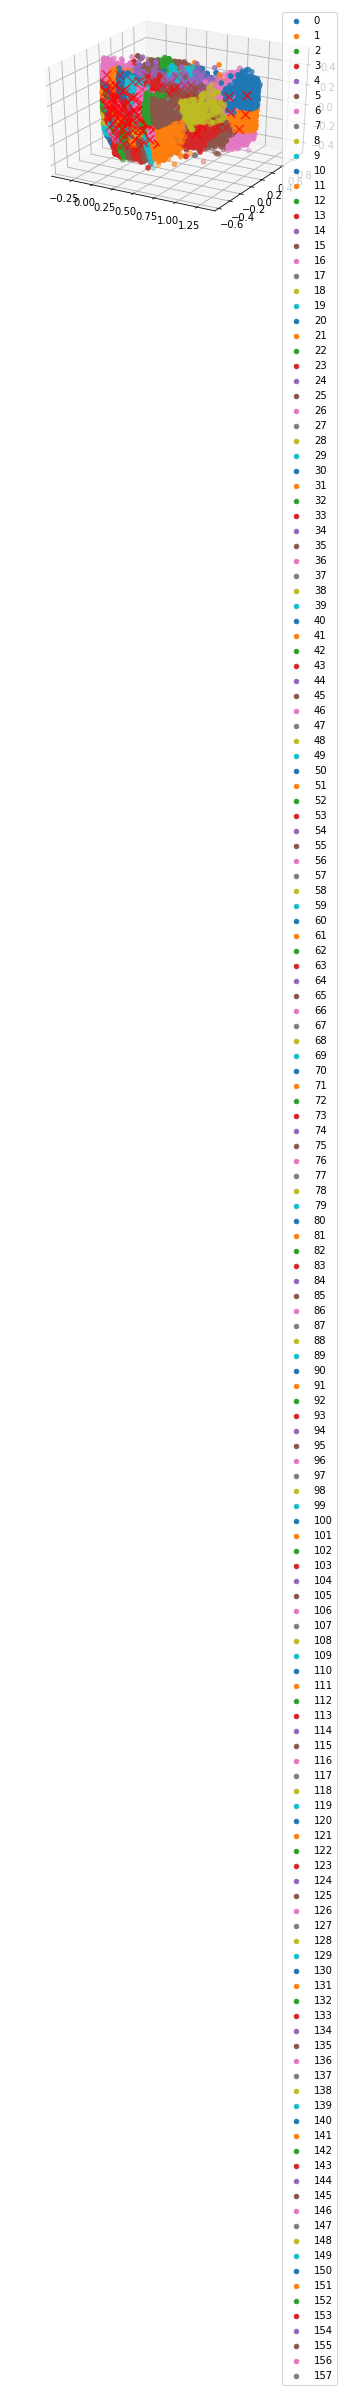

In [9]:
k_means_kwargs = {
    'init': np.array(averages), 
    'n_init':10, 
    'max_iter':300, 
    'random_state':42
}

k = len(sumKeys.keys()) # unique centers
# run K Means
print('Running KMEANS:')
kmeans = KMeans(n_clusters=k, **k_means_kwargs)
kmeans.fit(all_data[pca_cols])
print('lowest SSE: ', kmeans.inertia_)
print('silhouette score: ', silhouette_score(all_data[pca_cols], kmeans.labels_, metric='euclidean',))
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
print('Adjusted Rand Index: ', ari_kmeans)
all_data['labels_graph'] = kmeans.labels_



# PLOT THIS BAD BOY


#Getting the Centroids
centroids = kmeans.cluster_centers_
u_labels = np.unique(kmeans.labels_)

#plotting the results:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in u_labels:
    ax.scatter(all_data['pca-one'].loc[all_data['labels_graph'] == i], all_data['pca-two'].loc[all_data['labels_graph'] == i], all_data['pca-three'].loc[all_data['labels_graph'] == i], label=i)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], s = 80, color = 'red', marker='x')
ax.legend()
plt.show()

In [ ]:
print('Running DBSCAN:')
dbscan = DBSCAN(eps=0.25) # maximum distance between two samples
dbscan.fit(all_data[pca_cols])
print('silhouette score: ', silhouette_score(all_data[pca_cols], dbscan.labels_, metric='euclidean'))
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
print('Adjusted Rand Index: ', ari_dbscan)
all_data['labels_graph'] = dbscan.labels_



#Getting the Centroids
centroids = dbscan.cluster_centers_
u_labels = np.unique(dbscan.labels_)

#plotting the results:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
for i in u_labels:
    ax.scatter(all_data['pca-one'].loc[all_data['labels_graph'] == i], all_data['pca-two'].loc[all_data['labels_graph'] == i], all_data['pca-three'].loc[all_data['labels_graph'] == i], label=i)
ax.scatter(centroids[:,0], centroids[:,1], centroids[:,2], s = 80, color = 'red', marker='x')
ax.legend()
plt.show()

Running DBSCAN:


# just for funzies !!!!

In [5]:
true_labels = all_data['true_labels']

num_columns = ['popularity', 'acousticness', 'danceability', 'energy', 'instrumentalness', 'loudness', 'speechiness', 'tempo']

In [6]:
# find averages for each genre
cluster_centers = {} # key=GENRE, value=(sum,count)
for i in range(len(all_data)):
  row = all_data[num_columns].iloc[i,:].to_numpy()
  g = all_data.loc[i,['genre']][0]
  if(g not in cluster_centers):
    cluster_centers[g] = [row,1]
  else:
    cluster_centers[g][0] += row # element wise addition
    cluster_centers[g][1] += 1
  if(i % 1000==0):
    print('at row: ', i)
print(cluster_centers)

at row:  0
at row:  1000
at row:  2000
at row:  3000
at row:  4000
at row:  5000
at row:  6000
at row:  7000
at row:  8000
at row:  9000
at row:  10000
at row:  11000
at row:  12000
at row:  13000
at row:  14000
at row:  15000
at row:  16000
at row:  17000
at row:  18000
at row:  19000
at row:  20000
at row:  21000
at row:  22000
at row:  23000
at row:  24000
at row:  25000
at row:  26000
at row:  27000
at row:  28000
at row:  29000
at row:  30000
at row:  31000
at row:  32000
at row:  33000
at row:  34000
at row:  35000
at row:  36000
at row:  37000
at row:  38000
at row:  39000
at row:  40000
at row:  41000
at row:  42000
at row:  43000
at row:  44000
at row:  45000
at row:  46000
at row:  47000
at row:  48000
at row:  49000
at row:  50000
at row:  51000
at row:  52000
at row:  53000
at row:  54000
at row:  55000
at row:  56000
at row:  57000
at row:  58000
at row:  59000
at row:  60000
at row:  61000
at row:  62000
at row:  63000
at row:  64000
at row:  65000
at row:  66000
at row: 

In [7]:
# from kneed import KneeLocator
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import adjusted_rand_score


scaler = StandardScaler()
scaled_features = scaler.fit_transform(all_data[num_columns]) # makes mean of 0 and stdev of 1
# scaled_features = df_subset[feat_cols] # normalized

centers = [cluster_centers[k][0]/cluster_centers[k][1] for k in cluster_centers.keys()]

k_means_kwargs = {
    'init':np.array(centers), 
    'n_init':10, 
    'max_iter':300, 
    'random_state':42
}

k = len(cluster_centers.keys()) # unique centers
# run K Means
print('Running KMEANS:')
kmeans = KMeans(n_clusters=k, **k_means_kwargs)
kmeans.fit(scaled_features)
print('lowest SSE: ', kmeans.inertia_)
new_centers = kmeans.cluster_centers_
print('silhouette score: ', silhouette_score(scaled_features, kmeans.labels_, metric='euclidean',))
ari_kmeans = adjusted_rand_score(true_labels, kmeans.labels_)
print('Adjusted Rand Index: ', ari_kmeans)


Running KMEANS:


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:25: RuntimeWarning: Explicit initial center position passed: performing only one init in k-means instead of n_init=10


lowest SSE:  633930.7888527724
silhouette score:  0.1173732285307991
Adjusted Rand Index:  0.005614501683903813


# look at module 10, slide 40 for interpretation of values & 44 for future work!

In [ ]:
print('Running DBSCAN:')
dbscan = DBSCAN(eps=0.3)
dbscan.fit(scaled_features)
print('silhouette score: ', silhouette_score(scaled_features, dbscan.labels_, metric='euclidean'))
ari_dbscan = adjusted_rand_score(true_labels, dbscan.labels_)
print('Adjusted Rand Index: ', ari_dbscan)

# now looking for the best k for all clusters...

In [8]:
print(len(set(all_data['true_labels'])))
print(len(all_data['pca-one'].loc[all_data['true_labels'] == 0]))
print(len(all_data['pca-one'].loc[all_data['true_labels'] == 157]))

158
49774
776


In [15]:
# For reproducability of the results
np.random.seed(42)

N = 200 # sample 200 from each cluster, total of about 32k (158 unique genres)
data_sample = {}
for i in range(len(set(all_data['true_labels']))):
  data_sample[i] = all_data[num_columns].loc[all_data['true_labels'] == i].copy()
  rndperm = np.random.permutation(data_sample[i].shape[0])
  data_sample[i] = data_sample[i].iloc[rndperm[:N],:]
  if(i%50 == 0):
    print('currently at: ', i)

print('sampling done...')
sample_centers = {}
for i in range(len(set(all_data['true_labels']))):
  rows = data_sample[i].to_numpy()
  sample_centers[i] = np.mean(rows, axis=0)
  if(i%50 == 0):
    print('currently at: ', i)
print('centers done!')

currently at:  0
currently at:  50
currently at:  100
currently at:  150
sampling done...
currently at:  0
currently at:  50
currently at:  100
currently at:  150
centers done!


In [16]:
sample_centers = np.array([sample_centers[k] for k in sample_centers.keys()])

In [17]:
 for k in data_sample.keys():
   data_sample[k]['true_labels'] = int(k)
 data_sample = pd.concat([data_sample[k] for k in data_sample.keys()])
 data_sample = data_sample.sample(frac=1).reset_index(drop=True)

In [18]:
print(data_sample.head())

     popularity  acousticness  ...         tempo  true_labels
0  7.200000e-07         0.489  ...  5.703125e-08           45
1  7.300000e-07         0.844  ...  6.244812e-08          127
2  2.300000e-07         0.624  ...  7.187250e-08           13
3  2.400000e-07         0.722  ...  7.061062e-08          126
4  4.600000e-07         0.743  ...  7.500000e-08           66

[5 rows x 9 columns]


k=2 is done!
k=3 is done!
k=4 is done!
k=5 is done!
k=6 is done!
k=7 is done!
k=8 is done!
k=9 is done!
k=10 is done!
k=11 is done!
k=12 is done!
k=13 is done!
k=14 is done!
k=15 is done!
k=16 is done!
k=17 is done!
k=18 is done!
k=19 is done!


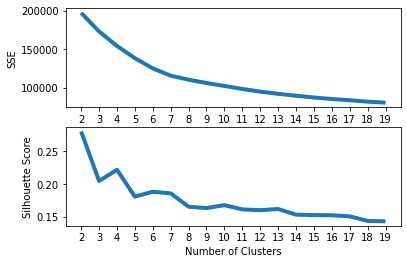

In [20]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(data_sample[num_columns]) # makes mean of 0 and stdev of 1

k_means_kwargs = {
    'init':'k-means++', 
    'n_init':10, 
    'max_iter':300, 
    'random_state':42
}
# Initialize by placing some centroid on either artist or genre for k-means
# make labels for validation: label the data
sse = []
silhouette = []
k_clusters = range(2,20)

for k in k_clusters:
    kmeans = KMeans(n_clusters=k, **k_means_kwargs)
    kmeans.fit(scaled_features)
    sse.append(kmeans.inertia_)
    silhouette.append(silhouette_score(scaled_features, kmeans.labels_, metric='euclidean'))
    print("k=%d is done!"%(k))


figure, axis = plt.subplots(2, 1)

plt.style.use("fivethirtyeight")
axis[0].plot(k_clusters,sse)
axis[0].set_xticks(k_clusters)
axis[0].set_xlabel("Number of Clusters")
axis[0].set_ylabel("SSE")

axis[1].plot(k_clusters,silhouette)
axis[1].set_xticks(k_clusters)
axis[1].set_xlabel("Number of Clusters")
axis[1].set_ylabel("Silhouette Score")

plt.show()

In [22]:
pip install kneed

In [25]:
from kneed import KneeLocator

kl = KneeLocator(k_clusters, sse, curve="convex", direction="decreasing")

print('The number of clusters (k) to choose for the data is: ',kl.elbow)

The number of clusters (k) to choose for the data is:  7
